In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [30]:
def load_and_preprocess_image(image_path):
    """加载并预处理图像"""
    # 使用PIL加载图像
    image = Image.open(image_path).convert('RGB')
    
    # 转换为numpy数组用于OpenCV处理
    image_cv = np.array(image)
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)
    
    # 转换为灰度图像用于SIFT检测
    gray_image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
    
    return image_cv, gray_image

In [31]:
def sift_feature_detection(gray_image, n_features=200):
    """使用SIFT算法检测特征点和描述符"""
    # 初始化SIFT检测器
    sift = cv2.SIFT_create(nfeatures=n_features)
    
    # 检测关键点和计算描述符
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    
    return keypoints, descriptors

In [32]:
def visualize_sift_features(image, keypoints, descriptors, title="SIFT feature extraction results"):
    """可视化SIFT特征点"""
    # 在图像上绘制关键点
    image_with_keypoints = cv2.drawKeypoints(
        image, 
        keypoints, 
        None, 
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    
    # 创建可视化图像
    plt.figure(figsize=(15, 10))
    
    # 显示原图
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('original feature')
    plt.axis('off')
    
    # 显示带有关键点的图像
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title(f'SIFT keypoints (total num:{len(keypoints)})')
    plt.axis('off')
    
    # 显示关键点分布热力图
    plt.subplot(2, 2, 3)
    # 创建关键点位置的热力图
    heatmap = np.zeros(image.shape[:2])
    for kp in keypoints:
        x, y = int(kp.pt[0]), int(kp.pt[1])
        if 0 <= x < image.shape[1] and 0 <= y < image.shape[0]:
            heatmap[y, x] += 1
    
    plt.imshow(heatmap, cmap='hot', alpha=0.7)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), alpha=0.3)
    plt.title('key points distribution hot map')
    plt.axis('off')
    plt.colorbar(label='keypoints density')
    
    # 显示描述符统计信息
    plt.subplot(2, 2, 4)
    if descriptors is not None:
        # 显示前几个描述符的统计信息
        desc_mean = np.mean(descriptors, axis=0)
        desc_std = np.std(descriptors, axis=0)
        
        plt.bar(range(len(desc_mean[:20])), desc_mean[:20], 
                yerr=desc_std[:20], alpha=0.7, capsize=5)
        plt.title('average and standard error of first 20 dimensions\' descriptors')
        plt.xlabel('dimension of the descriptors')
        plt.ylabel('数值')
    else:
        plt.text(0.5, 0.5, '无描述符信息', ha='center', va='center')
        plt.title('描述符信息')
    
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()
    
    return image_with_keypoints

In [33]:
def analyze_keypoints(keypoints, descriptors):
    """分析关键点特征"""
    if len(keypoints) == 0:
        print("未检测到关键点")
        return
    
    print(f"检测到 {len(keypoints)} 个关键点")
    print(f"描述符维度: {descriptors.shape[1] if descriptors is not None else '无'}")
    
    # 分析关键点尺度分布
    scales = [kp.size for kp in keypoints]
    orientations = [kp.angle for kp in keypoints]
    responses = [kp.response for kp in keypoints]
    
    print(f"尺度范围: {min(scales):.2f} - {max(scales):.2f}")
    print(f"方向范围: {min(orientations):.2f} - {max(orientations):.2f}")
    print(f"响应值范围: {min(responses):.2f} - {max(responses):.2f}")

In [34]:
def save_sift_results(image_with_keypoints, output_path):
    """保存结果图像"""
    cv2.imwrite(output_path, image_with_keypoints)
    print(f"结果已保存到: {output_path}")

正在加载图像...
图像尺寸: (515, 454, 3)
正在进行SIFT特征提取...
检测到 500 个关键点
描述符维度: 128
尺度范围: 1.80 - 101.11
方向范围: 0.14 - 359.98
响应值范围: 0.03 - 0.09
正在生成可视化结果...


C:\Users\wsq\AppData\Local\Temp\ipykernel_54296\3103399251.py:57: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wsq\AppData\Local\Temp\ipykernel_54296\3103399251.py:57: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wsq\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wsq\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


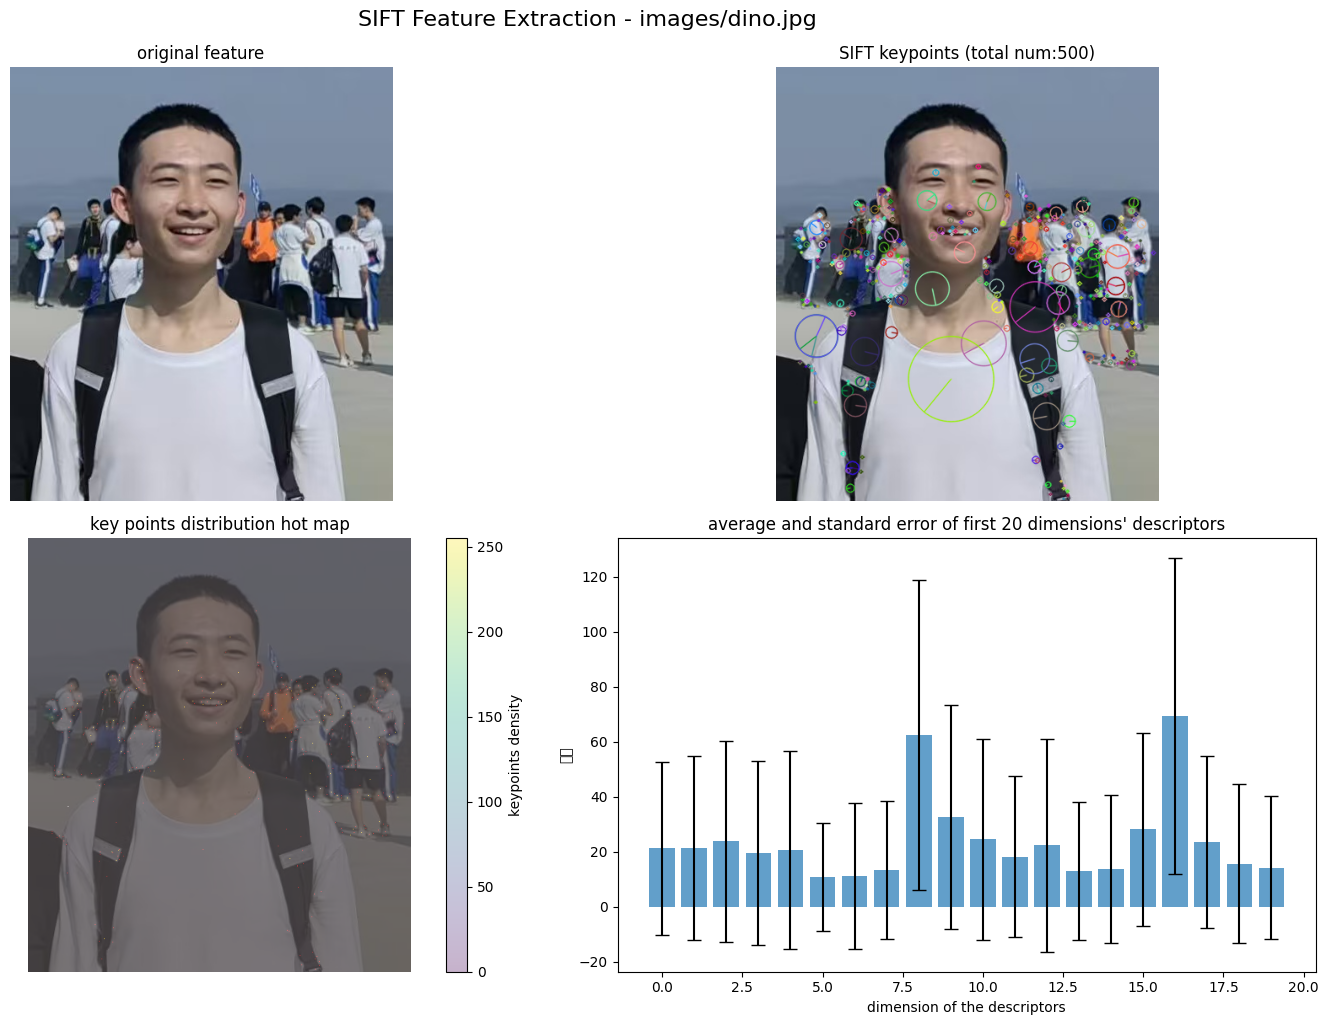

结果已保存到: sift_result.jpg


In [35]:
if __name__ == '__main__':
    image_path = "images/dino.jpg"  # 替换为您的图像路径

    try:
        # 1. 加载图像
        print("正在加载图像...")
        color_image, gray_image = load_and_preprocess_image(image_path)
        print(f"图像尺寸: {color_image.shape}")
        
        # 2. SIFT特征提取
        print("正在进行SIFT特征提取...")
        keypoints, descriptors = sift_feature_detection(gray_image, n_features=500)
        
        # 3. 分析关键点
        analyze_keypoints(keypoints, descriptors)
        
        # 4. 可视化结果
        print("正在生成可视化结果...")
        result_image = visualize_sift_features(
            color_image, 
            keypoints, 
            descriptors,
            title=f"SIFT Feature Extraction - {image_path}"
        )
        
        # 5. 保存结果
        output_path = "sift_result.jpg"
        save_sift_results(result_image, output_path)
        
    except Exception as e:
        print(f"错误: {e}")
        print("请检查图像路径是否正确")